# <u> **ML_Mini_Project_1**</u>

## Project: Loan Approval Prediction
### Goal: Predict whether a loan will be approved based on applicant information.

###  Step 1.1 – Load and Preview the Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Step 2: Explore the Dataset

### Step 2.1 – Dataset Info & Shape

In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

### Step 2.2 – Check for Missing Values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Step 2.3 – Target Variable Distribution

In [11]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

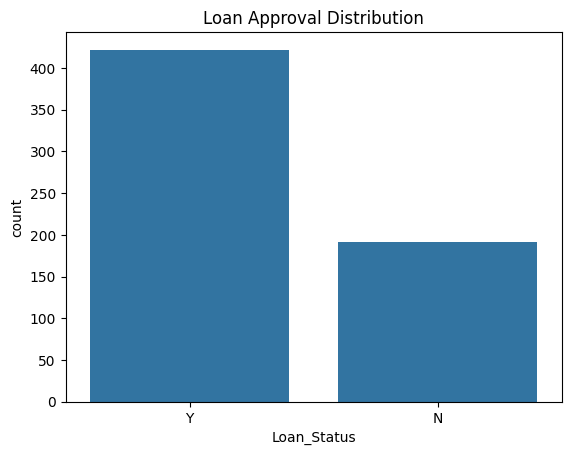

In [12]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()

###  Step 3: Data Cleaning & Preprocessing

### Step 3.1 – Fill Missing Values

In [13]:
# Fill numerical columns with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

# Fill categorical columns with mode (only if they have non-null values)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    mode_series = df[col].mode()
    if not mode_series.empty:
        df[col] = df[col].fillna(mode_series[0])


###  Step 3.2 – Drop 'Loan_ID'

In [14]:
df.drop('Loan_ID', axis=1, inplace=True)

### Step 3.3 – Convert Categorical to Numerical (Label Encoding)

In [15]:
# Convert target column
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# One-hot encode other categorical features
df = pd.get_dummies(df)


### Step 3.4 – Separate Features and Target

In [16]:
# Features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


### Step 4: Model Building & Evaluation

### Step 4.1 – Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  4.2 – Train Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Step 4.3 – Make Predictions

In [20]:
y_pred = model.predict(X_test_scaled)

###  Step 4.4 – Evaluate the Model

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Classification Report Breakdown
<br>Class	Precision	Recall	F1-score	Support
<br>0 (Not Approved)	0.95	0.42	0.58	43
<br>1 (Approved)	0.76	0.99	0.86	80

Key takeaways:
Precision for class 0 is high (0.95) → When the model predicts "Rejected", it's mostly correct.

Recall for class 0 is low (0.42) → It misses many people who should be rejected.

Recall for class 1 is very high (0.99) → It almost never misses an approved case.

F1 Score for class 1 is 0.86, which is very good.

### Step 5: Improve the Model
 ### 5.1 Try: Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7642276422764228
Confusion Matrix:
 [[19 24]
 [ 5 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train model (no more use_label_encoder)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



Accuracy: 0.7642276422764228
Confusion Matrix:
 [[20 23]
 [ 6 74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.47      0.58        43
           1       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



###  Model Comparison: Logistic Regression vs Random Forest vs XGBoost

| **Metric**          | **Logistic Regression** | **Random Forest** | **XGBoost** | **Which is better**     |
| ------------------- | ----------------------- | ----------------- | ----------- | ----------------------- |
| **Accuracy**        | 0.79                    | 0.79              | 0.76        | LR / RF (tie)           |
| **Precision (0)**   | 0.95                    | 0.80              | 0.77        | **Logistic Regression** |
| **Recall (0)**      | 0.42                    | 0.51              | 0.47        | **Random Forest**       |
| **F1-score (0)**    | 0.58                    | 0.62              | 0.58        | **Random Forest**       |
| **Precision (1)**   | 0.76                    | 0.78              | 0.76        | **Random Forest**       |
| **Recall (1)**      | 0.99                    | 0.94              | 0.93        | **Logistic Regression** |
| **F1-score (1)**    | 0.86                    | 0.85              | 0.84        | **Logistic Regression** |
| **Macro F1 Avg**    | 0.72                    | 0.74              | 0.71        | **Random Forest**       |
| **Weighted F1 Avg** | 0.76                    | 0.77              | 0.75        | **Random Forest**       |



## <b> Final Verdict:</b>
### *Random Forest wins on 5 out of 9 metrics — most balanced and best for real-world use.

### Logistic Regression has the highest precision for rejections and recall for approvals.

### XGBoost is close but slightly behind in this specific case.